### Imports

In [29]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Preprocessing

In [30]:
# Data Interpretation
print("@attribute SFH {1,-1,0}\n@attribute popUpWidnow {-1,0,1}\n@attribute SSLfinal_State {1,-1,0}\n@attribute Request_URL {-1,0,1}\n@attribute URL_of_Anchor {-1,0,1}\n@attribute web_traffic {1,0,-1}\n@attribute URL_Length {1,-1,0}\n@attribute age_of_domain {1,-1}\n@attribute having_IP_Address {0,1}\n@attribute Result {0,1,-1}")
print("\n1: Legitimate\n0: Suspicious\n-1: Phishy")

@attribute SFH {1,-1,0}
@attribute popUpWidnow {-1,0,1}
@attribute SSLfinal_State {1,-1,0}
@attribute Request_URL {-1,0,1}
@attribute URL_of_Anchor {-1,0,1}
@attribute web_traffic {1,0,-1}
@attribute URL_Length {1,-1,0}
@attribute age_of_domain {1,-1}
@attribute having_IP_Address {0,1}
@attribute Result {0,1,-1}

1: Legitimate
0: Suspicious
-1: Phishy


In [31]:
# Reading an arff file with scipy package
data = arff.loadarff(r"PhishingData.arff")
df = pd.DataFrame(data[0])
df

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'
...,...,...,...,...,...,...,...,...,...,...
1348,b'-1',b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'0',b'1'
1349,b'-1',b'0',b'1',b'0',b'-1',b'0',b'0',b'1',b'0',b'-1'
1350,b'-1',b'0',b'-1',b'-1',b'-1',b'0',b'-1',b'-1',b'0',b'1'
1351,b'0',b'0',b'1',b'0',b'0',b'0',b'-1',b'1',b'0',b'1'


In [32]:
# Removing the'b' from the dataframe
data = df.apply(lambda x: x.str.decode('utf8'))
data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [33]:
#Checking for NaN
print("Checking for NaN Values:")
print(data.isna().any(), '\n')

# Checking for Null Data
print("Checking for Null Values:")
print(data.isnull().any())

Checking for NaN Values:
SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool 

Checking for Null Values:
SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool


-1    702
1     548
0     103
Name: Result, dtype: int64

1: Legitimate
0: Suspicious
-1: Phishy


<AxesSubplot:xlabel='Result', ylabel='count'>

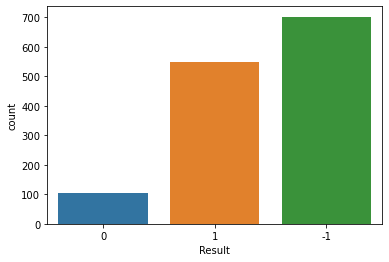

In [34]:
import warnings
print(data.Result.value_counts().sort_values(ascending = False))
warnings.filterwarnings("ignore")
print("\n1: Legitimate\n0: Suspicious\n-1: Phishy")
sns.countplot(data['Result']) # change color for meaning. EX: Phishy -> RED

In [35]:
x = data.drop(columns = ['Result'], axis = 1)
y = data['Result']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state = 42)
print("Train (Features):")
xtrain

Train (Features):


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
777,0,-1,0,0,0,-1,0,1,0
872,-1,-1,-1,-1,-1,-1,0,1,0
482,1,0,1,1,1,0,0,1,0
526,-1,0,0,-1,-1,0,-1,1,0
344,-1,0,-1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1095,1,0,1,1,0,0,1,1,0
1130,1,0,1,0,-1,1,1,-1,0
1294,-1,-1,-1,0,-1,0,1,1,0
860,-1,-1,-1,0,-1,0,0,1,0


In [37]:
print("Train (Target Column)")
ytrain

Train (Target Column)


777      0
872      1
482     -1
526      1
344      1
        ..
1095    -1
1130    -1
1294     1
860      1
1126     0
Name: Result, Length: 1014, dtype: object

In [38]:
print(xtrain.shape)
print(xtest.shape)

(1014, 9)
(339, 9)


### Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators = 1000)

In [40]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [41]:
rf_pred = rf.predict(xtest)

In [47]:
acc_rf = list()
for n in [1, 50, 100, 200, 400, 500, 800, 1000]:
    rf_for = RandomForestClassifier(n_estimators = n)
    rf_for = rf.fit(xtrain, ytrain)
    ypredict_rf = rf.predict(xtest)
    rf_cr = classification_report(ytest, ypredict_rf)
    
    print("\n")
    print("n =",n, rf_cr)



n = 1               precision    recall  f1-score   support

          -1       0.91      0.92      0.91       169
           0       0.87      0.84      0.85        31
           1       0.89      0.89      0.89       139

    accuracy                           0.90       339
   macro avg       0.89      0.88      0.89       339
weighted avg       0.90      0.90      0.90       339



n = 50               precision    recall  f1-score   support

          -1       0.91      0.92      0.92       169
           0       0.87      0.84      0.85        31
           1       0.90      0.89      0.90       139

    accuracy                           0.90       339
   macro avg       0.89      0.88      0.89       339
weighted avg       0.90      0.90      0.90       339



n = 100               precision    recall  f1-score   support

          -1       0.91      0.92      0.92       169
           0       0.87      0.84      0.85        31
           1       0.90      0.89      0.90     

In [43]:
rf_cr = classification_report(ytest, rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

          -1       0.91      0.92      0.91       169
           0       0.86      0.81      0.83        31
           1       0.89      0.89      0.89       139

    accuracy                           0.90       339
   macro avg       0.89      0.87      0.88       339
weighted avg       0.90      0.90      0.90       339



<AxesSubplot:>

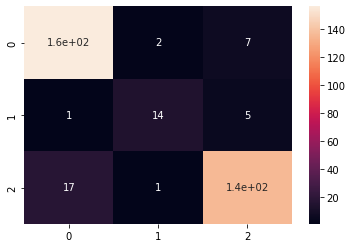

In [14]:
rf_cm = confusion_matrix(ytest, rf_pred)
sns.heatmap(rf_cm, annot = True)

### Basic MLP

In [20]:
# get_dummies -> creates a new columns per class (one-hot encoding)
# to_categorical -> only one column (not one-hot encoding)
xtrain_categorical = pd.get_dummies(xtrain)
xtest_categorical = pd.get_dummies(xtest)
ytrain_categorical = pd.get_dummies(ytrain)
ytest_categorical = pd.get_dummies(ytest)

In [24]:
print("Train (Features One-Hot Encoded)")
xtrain_categorical

Train (Features One-Hot Encoded)


,SFH_-1,SFH_0,SFH_1,popUpWidnow_-1,popUpWidnow_0,popUpWidnow_1,SSLfinal_State_-1,SSLfinal_State_0,SSLfinal_State_1,Request_URL_-1,...,web_traffic_-1,web_traffic_0,web_traffic_1,URL_Length_-1,URL_Length_0,URL_Length_1,age_of_domain_-1,age_of_domain_1,having_IP_Address_0,having_IP_Address_1
866,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
976,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
738,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1235,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
246,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0,0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,1,1,0
78,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
404,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,0
600,0,0,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0


In [27]:
print("Train (Target Column One-Hot Encoded)")
ytrain_categorical

Train (Target Column One-Hot Encoded)


,-1,0,1
866,0,0,1
976,0,0,1
738,1,0,0
1235,1,0,0
246,0,0,1
...,...,...,...
898,1,0,0
78,1,0,0
404,0,0,1
600,1,0,0


In [66]:
mlp_model_1 = Sequential()

mlp_model_1.add(Dense(64, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_1.add(Dropout(0.2))
mlp_model_1.add(Dense(64, activation = 'relu'))
mlp_model_1.add(Dropout(0.2))
mlp_model_1.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                1664      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6,019
Trainable params: 6,019
Non-trainable params: 0
_________________________________________________________________


In [67]:
batch_size_1 = 32
opt_1 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_1.compile(loss = 'categorical_crossentropy', optimizer = opt_1, metrics = ['accuracy'])

In [68]:
mlp_model_1.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_1,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
32/32 [==============================] - 2s 14ms/step - loss: 0.8986 - accuracy: 0.5740 - val_loss: 0.7452 - val_accuracy: 0.7109
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.7177 - accuracy: 0.7318 - val_loss: 0.6030 - val_accuracy: 0.8319
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.7998 - val_loss: 0.5052 - val_accuracy: 0.8466
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.8047 - val_loss: 0.4448 - val_accuracy: 0.8555
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.5125 - accuracy: 0.8176 - val_loss: 0.4197 - val_accuracy: 0.8643
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.8215 - val_loss: 0.3953 - val_accuracy: 0.8643
Epoch 7/20
32/32 [==============================] - 0s 10ms/step - loss: 0.4460 - accuracy: 0.8373 - val_loss: 0.3804 - val_accuracy: 0.8673
Epoch 8/20
32/32 [

In [69]:
_, acc1 = mlp_model_1.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_1, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc1))


Accuracy: 88.8%


### Basic MLP Variation 1
    - Using Sigmoid

In [70]:
mlp_model_5 = Sequential()

mlp_model_5.add(Dense(64, activation = 'sigmoid', input_dim = xtrain_categorical.shape[1]))
mlp_model_5.add(Dropout(0.2))
mlp_model_5.add(Dense(64, activation = 'sigmoid'))
mlp_model_5.add(Dropout(0.2))
mlp_model_5.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                1664      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6,019
Trainable params: 6,019
Non-trainable params: 0
_________________________________________________________________


In [71]:
batch_size_5 = 32
opt_5 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_5.compile(loss = 'categorical_crossentropy', optimizer = opt_5, metrics = ['accuracy'])

In [72]:
mlp_model_5.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_5,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
32/32 [==============================] - 2s 20ms/step - loss: 0.9675 - accuracy: 0.4852 - val_loss: 0.8790 - val_accuracy: 0.4867
Epoch 2/20
32/32 [==============================] - 0s 6ms/step - loss: 0.9312 - accuracy: 0.5138 - val_loss: 0.8532 - val_accuracy: 0.4867
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.8913 - accuracy: 0.5602 - val_loss: 0.8374 - val_accuracy: 0.4867
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 0.8854 - accuracy: 0.5592 - val_loss: 0.8139 - val_accuracy: 0.4867
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.8655 - accuracy: 0.5966 - val_loss: 0.7939 - val_accuracy: 0.5398
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.8373 - accuracy: 0.6302 - val_loss: 0.7574 - val_accuracy: 0.7670
Epoch 7/20
32/32 [==============================] - 0s 10ms/step - loss: 0.8085 - accuracy: 0.6765 - val_loss: 0.7291 - val_accuracy: 0.7729
Epoch 8/20
32/32 

In [73]:
_, acc5 = mlp_model_5.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_5, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc5))


Accuracy: 85.0%


### MLP Variation
    - Using tanh

In [74]:
mlp_model_6 = Sequential()

mlp_model_6.add(Dense(64, activation = 'tanh', input_dim = xtrain_categorical.shape[1]))
mlp_model_6.add(Dropout(0.2))
mlp_model_6.add(Dense(64, activation = 'tanh'))
mlp_model_6.add(Dropout(0.2))
mlp_model_6.add(Dense(3, activation = 'softmax'))

mlp_model_6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                1664      
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6,019
Trainable params: 6,019
Non-trainable params: 0
_________________________________________________________________


In [75]:
batch_size_6 = 32
opt_6 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_6.compile(loss = 'categorical_crossentropy', optimizer = opt_6, metrics = ['accuracy'])

In [76]:
mlp_model_6.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_6,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
32/32 [==============================] - 2s 19ms/step - loss: 0.8590 - accuracy: 0.6124 - val_loss: 0.6350 - val_accuracy: 0.8201
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.8028 - val_loss: 0.5124 - val_accuracy: 0.8378
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.8116 - val_loss: 0.4403 - val_accuracy: 0.8525
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.8215 - val_loss: 0.4084 - val_accuracy: 0.8614
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8422 - val_loss: 0.3901 - val_accuracy: 0.8643
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4315 - accuracy: 0.8383 - val_loss: 0.3726 - val_accuracy: 0.8643
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8491 - val_loss: 0.3688 - val_accuracy: 0.8732
Epoch 8/20
32/32 [=

In [77]:
_, acc6 = mlp_model_6.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_6, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc6))


Accuracy: 87.6%


### MLP Variation 2
    - Increased Dense Units
    - Increased Batch Size to 64

In [20]:
mlp_model_2 = Sequential()

mlp_model_2.add(Dense(100, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_2.add(Dropout(0.2))
mlp_model_2.add(Dense(100, activation = 'relu'))
mlp_model_2.add(Dropout(0.2))
mlp_model_2.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2600      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 13,003
Trainable params: 13,003
Non-trainable params: 0
_________________________________________________________________


In [21]:
batch_size_2 = 50
opt_2 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_2.compile(loss = 'categorical_crossentropy', optimizer = opt_2, metrics = ['accuracy'])

In [22]:
mlp_model_2.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_2,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
21/21 [==============================] - 2s 22ms/step - loss: 0.9025 - accuracy: 0.6134 - val_loss: 0.7050 - val_accuracy: 0.8053
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.7929 - val_loss: 0.5759 - val_accuracy: 0.8378
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5853 - accuracy: 0.8136 - val_loss: 0.4823 - val_accuracy: 0.8555
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5142 - accuracy: 0.8363 - val_loss: 0.4378 - val_accuracy: 0.8614
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4629 - accuracy: 0.8353 - val_loss: 0.4041 - val_accuracy: 0.8673
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 0.4480 - accuracy: 0.8412 - val_loss: 0.3910 - val_accuracy: 0.8761
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.8452 - val_loss: 0.3739 - val_accuracy: 0.8732
Epoch 8/20
21/21 [=

In [23]:
_, acc2 = mlp_model_2.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_2, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc2))


Accuracy: 89.1%


### MLP Variation 2
    - Model is deeper as it has 4 Dense layers all using relu activation function.

In [28]:
mlp_model_3 = Sequential()

mlp_model_3.add(Dense(200, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_3.add(Dropout(0.2))
mlp_model_3.add(Dense(200, activation = 'relu'))
mlp_model_3.add(Dropout(0.2))
mlp_model_3.add(Dense(200, activation = 'relu'))
mlp_model_3.add(Dropout(0.2))
mlp_model_3.add(Dense(200, activation = 'relu'))
mlp_model_3.add(Dropout(0.2))

mlp_model_3.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 200)               5200      
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               40200     
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               40200     
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 200)              

In [29]:
batch_size_3 = 64
opt_3 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_3.compile(loss = 'categorical_crossentropy', optimizer = opt_3, metrics = ['accuracy'])

In [30]:
mlp_model_3.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_3,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 0.7789 - accuracy: 0.6667 - val_loss: 0.5041 - val_accuracy: 0.8260
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4894 - accuracy: 0.8294 - val_loss: 0.3873 - val_accuracy: 0.8555
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4514 - accuracy: 0.8373 - val_loss: 0.3727 - val_accuracy: 0.8820
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4082 - accuracy: 0.8422 - val_loss: 0.3378 - val_accuracy: 0.8850
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3884 - accuracy: 0.8560 - val_loss: 0.3201 - val_accuracy: 0.8879
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3693 - accuracy: 0.8600 - val_loss: 0.3116 - val_accuracy: 0.8791
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3479 - accuracy: 0.8659 - val_loss: 0.2951 - val_accuracy: 0.8909
Epoch 8/20
16

In [31]:
_, acc3 = mlp_model_3.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_3, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc3))


Accuracy: 89.7%


In [102]:
# Lets try changing the optimizers to see if we can achieve a better performance
opt_3_adam = keras.optimizers.Adam(lr = 0.0005)
opt_3_sgd = keras.optimizers.SGD(lr = 0.0005)
opt_3_adagrad = keras.optimizers.Adagrad(lr = 0.0005)

### Adam Optimizer

In [103]:
mlp_model_3.compile(loss = 'categorical_crossentropy', optimizer = opt_3_adam, metrics = ['accuracy'])

mlp_model_3.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_3,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

_, acc3 = mlp_model_3.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_3, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc3))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 0.2188 - accuracy: 0.9152 - val_loss: 0.2793 - val_accuracy: 0.9027
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1999 - accuracy: 0.9191 - val_loss: 0.2807 - val_accuracy: 0.8997
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1756 - accuracy: 0.9329 - val_loss: 0.2763 - val_accuracy: 0.8997
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1900 - accuracy: 0.9260 - val_loss: 0.2774 - val_accuracy: 0.9174
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1939 - accuracy: 0.9250 - val_loss: 0.2729 - val_accuracy: 0.9027
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1707 - accuracy: 0.9359 - val_loss: 0.2719 - val_accuracy: 0.9145
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1580 - accuracy: 0.9270 - val_loss: 0.2731 - val_accuracy: 0.9027
Epoch 8/20
16

### SGD Optimizer

In [104]:
mlp_model_3.compile(loss = 'categorical_crossentropy', optimizer = opt_3_sgd, metrics = ['accuracy'])

mlp_model_3.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_3,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

_, acc3 = mlp_model_3.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_3, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc3))

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 0.1426 - accuracy: 0.9379 - val_loss: 0.3129 - val_accuracy: 0.9145
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1360 - accuracy: 0.9379 - val_loss: 0.3123 - val_accuracy: 0.9145
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1326 - accuracy: 0.9408 - val_loss: 0.3116 - val_accuracy: 0.9145
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1439 - accuracy: 0.9290 - val_loss: 0.3110 - val_accuracy: 0.9145
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1368 - accuracy: 0.9448 - val_loss: 0.3103 - val_accuracy: 0.9145
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1277 - accuracy: 0.9487 - val_loss: 0.3099 - val_accuracy: 0.9145
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1409 - accuracy: 0.9418 - val_loss: 0.3096 - val_accuracy: 0.9145
Epoch 8/20
16

### Adagrad Optimizer

In [105]:
mlp_model_3.compile(loss = 'categorical_crossentropy', optimizer = opt_3_adagrad, metrics = ['accuracy'])

mlp_model_3.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_3,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

_, acc3 = mlp_model_3.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_3, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc3))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 0.1300 - accuracy: 0.9467 - val_loss: 0.3063 - val_accuracy: 0.9174
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1236 - accuracy: 0.9536 - val_loss: 0.3062 - val_accuracy: 0.9174
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1320 - accuracy: 0.9438 - val_loss: 0.3057 - val_accuracy: 0.9145
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.1309 - accuracy: 0.9448 - val_loss: 0.3057 - val_accuracy: 0.9174
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.1250 - accuracy: 0.9507 - val_loss: 0.3057 - val_accuracy: 0.9204
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.1204 - accuracy: 0.9507 - val_loss: 0.3058 - val_accuracy: 0.9204
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.1378 - accuracy: 0.9398 - val_loss: 0.3056 - val_accuracy: 0.9204
Epoch 8/20
16

### MLP Variation
    - Many Layers
    - Now Using tanh

In [82]:
mlp_model_7 = Sequential()

mlp_model_7.add(Dense(200, activation = 'tanh', input_dim = xtrain_categorical.shape[1]))
mlp_model_7.add(Dropout(0.2))
mlp_model_7.add(Dense(200, activation = 'tanh'))
mlp_model_7.add(Dropout(0.2))
mlp_model_7.add(Dense(200, activation = 'tanh'))
mlp_model_7.add(Dropout(0.2))
mlp_model_7.add(Dense(200, activation = 'tanh'))
mlp_model_7.add(Dropout(0.2))

mlp_model_7.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 200)               5200      
                                                                 
 dropout_40 (Dropout)        (None, 200)               0         
                                                                 
 dense_57 (Dense)            (None, 200)               40200     
                                                                 
 dropout_41 (Dropout)        (None, 200)               0         
                                                                 
 dense_58 (Dense)            (None, 200)               40200     
                                                                 
 dropout_42 (Dropout)        (None, 200)               0         
                                                                 
 dense_59 (Dense)            (None, 200)             

In [83]:
batch_size_7 = 64
opt_7 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_7.compile(loss = 'categorical_crossentropy', optimizer = opt_7, metrics = ['accuracy'])

In [84]:
mlp_model_7.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_7,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 0.5521 - accuracy: 0.7998 - val_loss: 0.3945 - val_accuracy: 0.8555
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4507 - accuracy: 0.8353 - val_loss: 0.3941 - val_accuracy: 0.8614
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4394 - accuracy: 0.8363 - val_loss: 0.3531 - val_accuracy: 0.8761
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4064 - accuracy: 0.8491 - val_loss: 0.3633 - val_accuracy: 0.8673
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.3983 - accuracy: 0.8452 - val_loss: 0.3616 - val_accuracy: 0.8791
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4079 - accuracy: 0.8501 - val_loss: 0.3343 - val_accuracy: 0.8850
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.3936 - accuracy: 0.8412 - val_loss: 0.3211 - val_accuracy: 0.8820
Epoch 8/20
16

In [85]:
_, acc7 = mlp_model_7.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_7, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc7))


Accuracy: 89.1%


### MLP Variation
    - Many Layers
    - Using sigmoid

### MLP Variation 3
    - Even Deeper

In [32]:
mlp_model_4 = Sequential()

mlp_model_4.add(Dense(100, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_4.add(Dropout(0.2))
mlp_model_4.add(Dense(100, activation = 'relu'))
mlp_model_4.add(Dropout(0.2))
mlp_model_4.add(Dense(100, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_4.add(Dropout(0.2))
mlp_model_4.add(Dense(100, activation = 'relu'))
mlp_model_4.add(Dropout(0.2))
mlp_model_4.add(Dense(100, activation = 'relu', input_dim = xtrain_categorical.shape[1]))
mlp_model_4.add(Dropout(0.2))
mlp_model_4.add(Dense(100, activation = 'relu'))
mlp_model_4.add(Dropout(0.2))

mlp_model_4.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               2600      
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)              

In [33]:
batch_size_4 = 32
opt_4 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_4.compile(loss = 'categorical_crossentropy', optimizer = opt_4, metrics = ['accuracy'])

In [34]:
mlp_model_4.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_4,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
32/32 [==============================] - 3s 17ms/step - loss: 0.9288 - accuracy: 0.5404 - val_loss: 0.7351 - val_accuracy: 0.7906
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6581 - accuracy: 0.7446 - val_loss: 0.4933 - val_accuracy: 0.8466
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.5445 - accuracy: 0.8057 - val_loss: 0.4209 - val_accuracy: 0.8673
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4900 - accuracy: 0.8323 - val_loss: 0.4023 - val_accuracy: 0.8673
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4683 - accuracy: 0.8343 - val_loss: 0.3875 - val_accuracy: 0.8732
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4594 - accuracy: 0.8353 - val_loss: 0.3761 - val_accuracy: 0.8791
Epoch 7/20
32/32 [==============================] - 0s 8ms/step - loss: 0.4460 - accuracy: 0.8432 - val_loss: 0.3666 - val_accuracy: 0.8791
Epoch 8/20
32/32 [=

In [36]:
_, acc4 = mlp_model_4.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_4, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc4))


Accuracy: 88.8%


In [86]:
mlp_model_8 = Sequential()

mlp_model_8.add(Dense(200, activation = 'sigmoid', input_dim = xtrain_categorical.shape[1]))
mlp_model_8.add(Dropout(0.2))
mlp_model_8.add(Dense(200, activation = 'sigmoid'))
mlp_model_8.add(Dropout(0.2))
mlp_model_8.add(Dense(200, activation = 'sigmoid'))
mlp_model_8.add(Dropout(0.2))
mlp_model_8.add(Dense(200, activation = 'sigmoid'))
mlp_model_8.add(Dropout(0.2))

mlp_model_8.add(Dense(3, activation = 'softmax')) # change softmax

mlp_model_8.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 200)               5200      
                                                                 
 dropout_44 (Dropout)        (None, 200)               0         
                                                                 
 dense_62 (Dense)            (None, 200)               40200     
                                                                 
 dropout_45 (Dropout)        (None, 200)               0         
                                                                 
 dense_63 (Dense)            (None, 200)               40200     
                                                                 
 dropout_46 (Dropout)        (None, 200)               0         
                                                                 
 dense_64 (Dense)            (None, 200)             

In [87]:
batch_size_8 = 64
opt_8 = keras.optimizers.RMSprop(lr = 0.0005) 

mlp_model_8.compile(loss = 'categorical_crossentropy', optimizer = opt_8, metrics = ['accuracy'])

In [88]:
mlp_model_8.fit(
    xtrain_categorical, ytrain_categorical,
    batch_size = batch_size_8,
    epochs = 20,
    validation_data = (xtest_categorical, ytest_categorical),
    shuffle = True)

Epoch 1/20
16/16 [==============================] - 3s 49ms/step - loss: 0.9693 - accuracy: 0.4763 - val_loss: 0.8810 - val_accuracy: 0.4867
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9550 - accuracy: 0.4822 - val_loss: 0.9031 - val_accuracy: 0.4867
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9375 - accuracy: 0.4941 - val_loss: 0.8744 - val_accuracy: 0.4867
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9399 - accuracy: 0.5138 - val_loss: 0.8692 - val_accuracy: 0.4867
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9290 - accuracy: 0.5286 - val_loss: 0.9386 - val_accuracy: 0.4867
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9299 - accuracy: 0.5306 - val_loss: 0.8627 - val_accuracy: 0.4867
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.9103 - accuracy: 0.5335 - val_loss: 0.8482 - val_accuracy: 0.4867
Epoch 8/20
16

In [89]:
_, acc8 = mlp_model_8.evaluate(xtest_categorical, ytest_categorical, batch_size = batch_size_8, verbose = 0)

print("")
print("Accuracy: %.1f%%" % (100.0 * acc8))


Accuracy: 86.1%


### CNN

In [ ]:
# Conv1D not ideal for a categorical dataframe
# cnn = Sequential()

# cnn.add(Conv1D(64, ))

# sklearn models:
    # decision tree classifier
    # Gradient Boost